In [1]:
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from assets.xlsx_parse import xlsx_parse as xlsx_parse
from assets.df_empty import df_empty as df_empty
# from assets.list_show import list_show as list_show
# from assets.df_show import df_show as df_show
# from assets.wb_request import wb_request as wb_request


#

In [2]:
'''DATA PREPARATION'''
#

'DATA PREPARATION'

In [3]:
date_range = (datetime.datetime(2017, 1, 1), datetime.datetime(2017, 12, 31))
useless_data = ['Cool Name', 'Counter', 'Hult Region', 'Country Code']

df = xlsx_parse.df_create(
                          'data/WDIW.xlsx', 0,
                          'Cool Name', 'Bumblebee',
                          'Country Name', 'World')

full_empty_columns = df_empty.search(df)
partially_empty_columns = df_empty.search(df, 3)
country_codes = df['Country Code'].tolist()
df = df.drop(full_empty_columns
             + partially_empty_columns
             + useless_data, axis=1)
df = df.fillna(0)
df.to_excel(r'data\DF.xlsx')
df['GDP per Capita'] = df['GDP (current US$)']/df['Population, total']
df.set_index(df.columns[0])
df = df.reset_index(drop=True)

#

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df

#

,Country Name,Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)","Age dependency ratio, young (% of working-age population)","Agriculture, forestry, and fishing, value added (% of GDP)",Armed forces personnel (% of total labor force),"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Employment in agriculture (% of total employment) (modeled ILO estimate),Employment in industry (% of total employment) (modeled ILO estimate),Employment in services (% of total employment) (modeled ILO estimate),"Fertility rate, total (births per woman)",GDP (current US$),GDP growth (annual %),"Industry (including construction), value added (% of GDP)","Life expectancy at birth, total (years)",Merchandise trade (% of GDP),Military expenditure (% of GDP),Mobile cellular subscriptions (per 100 people),Number of people pushed below the $3.10 ($ 2011 PPP) poverty line by out-of-pocket health care expenditure,Population ages 0-14 (% of total population),Population ages 15-64 (% of total population),Population ages 65 and above (% of total population),Population density (people per sq. km of land area),Population growth (annual %),Population in the largest city (% of urban population),Population living in slums (% of urban population),"Population, female","Population, male","Population, total","Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),Rural population (% of total population),"Services, value added (% of GDP)",Surface area (sq. km),Urban population (% of total population),Urban population growth (annual %),GDP per Capita
0,Algeria,100.000000,100.000000,100.000000,10.071000,55.804001,9.624334,46.179668,12.272164,2.631164,24.846000,4.717000,9.386000,30.754999,59.859001,3.045000,1.675553e+11,1.600000,37.242121,76.499000,48.491459,6.014253,110.767246,0.300284,29.639590,64.183205,6.177205,17.377715,2.044953,8.917563,0.494109,2.048243e+07,2.090677e+07,4.138920e+07,0.1,3.9,27.948000,45.615016,2.381740e+06,72.052000,2.871374,4048.285258
1,Chad,10.876416,2.488017,39.185883,161.090000,99.470559,4.920371,94.550188,48.613086,0.621619,42.683000,12.309000,81.706001,3.039000,15.255000,5.846000,9.975692e+09,-2.988696,14.628548,53.712000,43.104779,2.238589,42.409967,0.419905,47.400573,50.132708,2.466718,11.925646,3.077532,37.165721,0.466319,7.521764e+06,7.495009e+06,1.501677e+07,1.3,37.5,77.142000,33.507131,1.284000e+06,22.858000,3.872530,664.303316
2,Egypt,100.000000,100.000000,100.000000,53.819000,63.836313,8.499716,55.336597,11.485285,2.726499,27.050000,5.863000,25.040001,26.570999,48.389000,3.370000,2.353691e+11,4.181221,33.750764,71.656000,37.061360,1.422609,106.755939,0.000000,33.775538,61.036530,5.187932,96.883413,2.090835,47.706510,0.423632,4.770682e+07,4.873578e+07,9.644259e+07,0.1,4.5,57.295000,53.020542,1.001450e+06,42.705000,2.027629,2440.510173
3,Libya,70.148201,70.148201,70.148201,5.769000,48.961526,6.448804,42.512723,0.000000,0.000000,19.380000,5.099000,8.037000,26.697001,65.265999,2.277000,3.811598e+10,26.675870,0.000000,72.520000,78.014519,0.000000,91.479296,0.346465,28.539398,67.131428,4.329174,3.740025,1.354886,21.889046,0.730092,3.255123e+06,3.325601e+06,6.580724e+06,0.2,0.0,20.183000,0.000000,1.759540e+06,79.817000,1.702529,5792.065110
4,Mali,43.089840,11.711073,87.191605,169.127000,100.955473,5.053860,95.901614,38.334734,0.261941,42.078000,9.984000,65.716003,6.390000,27.893999,5.968000,1.533961e+10,5.400000,18.112626,58.452000,46.885142,3.011908,119.023326,0.200731,47.722817,49.762268,2.514916,15.171731,2.999115,30.773852,0.617212,9.249013e+06,9.263381e+06,1.851239e+07,1.3,6.3,58.428000,37.539617,1.240190e+06,41.572000,4.915262,828.613220
5,Mauritania,42.912319,0.000000,82.618835,71.049000,76.

In [5]:
df.dtypes

#

Country Name                                                                                                   object
Access to electricity (% of population)                                                                       float64
Access to electricity, rural (% of rural population)                                                          float64
Access to electricity, urban (% of urban population)                                                          float64
Adolescent fertility rate (births per 1,000 women ages 15-19)                                                 float64
Age dependency ratio (% of working-age population)                                                            float64
Age dependency ratio, old (% of working-age population)                                                       float64
Age dependency ratio, young (% of working-age population)                                                     float64
Agriculture, forestry, and fishing, value added (% of GD

In [6]:
df.describe()

#

,Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)","Age dependency ratio, young (% of working-age population)","Agriculture, forestry, and fishing, value added (% of GDP)",Armed forces personnel (% of total labor force),"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Employment in agriculture (% of total employment) (modeled ILO estimate),Employment in industry (% of total employment) (modeled ILO estimate),Employment in services (% of total employment) (modeled ILO estimate),"Fertility rate, total (births per woman)",GDP (current US$),GDP growth (annual %),"Industry (including construction), value added (% of GDP)","Life expectancy at birth, total (years)",Merchandise trade (% of GDP),Military expenditure (% of GDP),Mobile cellular subscriptions (per 100 people),Number of people pushed below the $3.10 ($ 2011 PPP) poverty line by out-of-pocket health care expenditure,Population ages 0-14 (% of total population),Population ages 15-64 (% of total population),Population ages 65 and above (% of total population),Population density (people per sq. km of land area),Population growth (annual %),Population in the largest city (% of urban population),Population living in slums (% of urban population),"Population, female","Population, male","Population, total","Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),Rural population (% of total population),"Services, value added (% of GDP)",Surface area (sq. km),Urban population (% of total population),Urban population growth (annual %),GDP per Capita
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,1.100000e+01,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,1.100000e+01,1.100000e+01,1.100000e+01,11.000000,11.000000,11.000000,11.000000,1.100000e+01,11.000000,11.000000,11.000000
mean,66.578988,56.057798,84.193252,72.980609,71.861133,7.932813,63.804983,20.912317,1.209900,29.574267,7.271764,40.605301,18.653717,40.740980,3.972417,7.422137e+12,5.104724,20.309155,68.063092,52.333029,2.677830,93.451033,0.246101,35.980643,59.166252,4.853104,34.418448,2.199079,30.061622,0.506504,3.516529e+08,3.574197e+08,7.093314e+08,0.427273,10.700000,50.189069,42.449950,1.296467e+07,49.810931,2.992292,3243.075601
std,33.851774,43.164137,19.240967,67.648966,23.247553,2.930745,25.685382,16.219943,0.975055,10.652261,2.312041,26.267401,10.408342,16.445927,1.708521,2.436710e+13,7.514132,11.708233,7.875937,22.233545,1.504014,30.128825,0.177164,9.615099,7.615523,2.266150,35.499695,0.913405,13.323205,0.123522,1.118202e+09,1.136942e+09,2.256003e+09,0.475586,10.738343,20.329930,17.263537,3.949761e+07,20.329930,1.201660,2993.548686
min,10.876416,0.000000,39.185883,5.769000,47.414265,4.920371,35.543976,0.000000,0.000000,18.010000,4.717000,8.037000,3.039000,15.255000,2.219000,4.975432e+09,-2.988696,0.000000,53.712000,10.754682,0.000000,40.638500,0.000000,24.111626,47.316356,2.466718,0.000000,1.139079,8.917563,0.326436,2.134658e+06,2.147916e+06,4.282574e+06,0.100000,0.000000,20.183000,0.000000,0.000000e+00,16.350000,1.571234,375.869490
25%,43.001080,11.277787,76.337009,20.552500,53.103126,5.503016,42.118884,10.514312,0.441780,19.389500,5.481000,20.041000,9.551500,30.558499,2.441292,1.265765e+10,2.427078,15.245202,63.031500,40.998896,2.146080,80.831237,0.147018,27.995998,52.871439,2.860737,8.040330,1.320944,19.236713,0.444976,6.644926e+06,6.580182e+06,1.322511e+07,0.100000,4.100000,34.725000,37.203392,7.240000e+05,37.971000,2.006382,995.199338
50%,70.148201,70.148201,87.191605,53.819

In [7]:
'''CORRELATIONS'''
#

'CORRELATIONS'

In [8]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

#

In [9]:
corr = df[[
    'Employment in agriculture (% of total employment) (modeled ILO estimate)',
    'Employment in industry (% of total employment) (modeled ILO estimate)',
    'Employment in services (% of total employment) (modeled ILO estimate)'
    ]].corr()
corr.style.background_gradient(cmap='coolwarm')

#

,Employment in agriculture (% of total employment) (modeled ILO estimate),Employment in industry (% of total employment) (modeled ILO estimate),Employment in services (% of total employment) (modeled ILO estimate)
Employment in agriculture (% of total employment) (modeled ILO estimate),1,-0.965328,-0.986259
Employment in industry (% of total employment) (modeled ILO estimate),-0.965328,1,0.908937
Employment in services (% of total employment) (modeled ILO estimate),-0.986259,0.908937,1


In [10]:
corr = df[[
    'Agriculture, forestry, and fishing, value added (% of GDP)',
    'Industry (including construction), value added (% of GDP)',
    'Services, value added (% of GDP)'
    ]].corr()
corr.style.background_gradient(cmap='coolwarm')

#

,"Agriculture, forestry, and fishing, value added (% of GDP)","Industry (including construction), value added (% of GDP)","Services, value added (% of GDP)"
"Agriculture, forestry, and fishing, value added (% of GDP)",1,-0.238161,-0.102656
"Industry (including construction), value added (% of GDP)",-0.238161,1,0.610925
"Services, value added (% of GDP)",-0.102656,0.610925,1


In [11]:
'''BAR PLOTS AND HISTOGRAMS'''
#

'BAR PLOTS AND HISTOGRAMS'

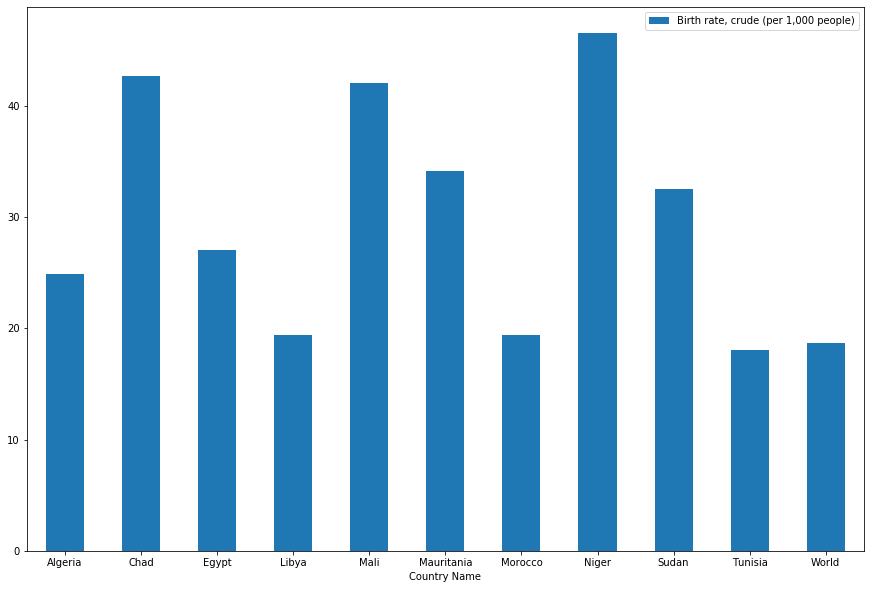

In [12]:
df.plot.bar(x='Country Name',
            y='Birth rate, crude (per 1,000 people)',
            rot=0,
            figsize=(15, 10))

#

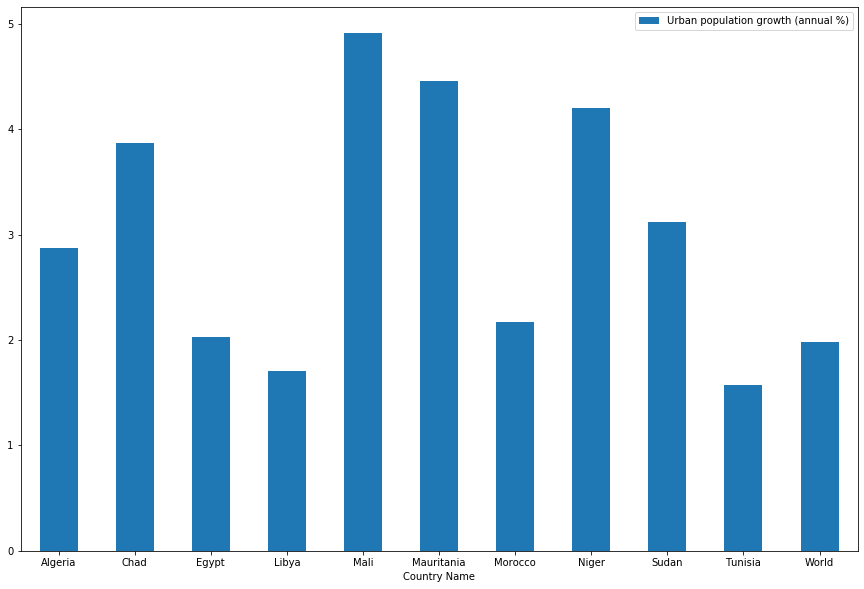

In [13]:
df.plot.bar(x='Country Name',
            y='Urban population growth (annual %)',
            rot=0,
            figsize=(15, 10))

#

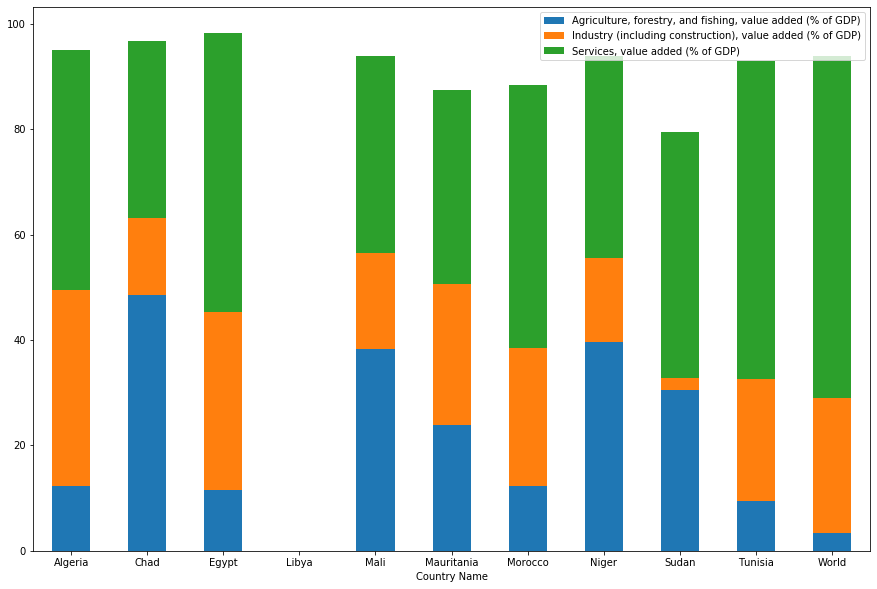

In [14]:
df.plot.bar(x='Country Name',
            y=[
                'Agriculture, forestry, and fishing, value added (% of GDP)',
                'Industry (including construction), value added (% of GDP)',
                'Services, value added (% of GDP)'
                ],
            stacked=True,
            rot=0,
            figsize=(15, 10))

#

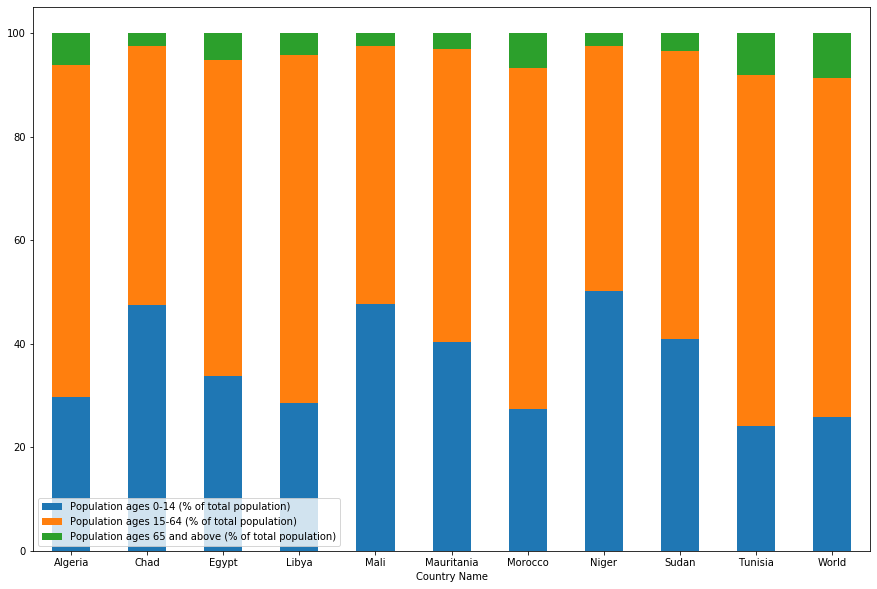

In [15]:
df.plot.bar(x='Country Name',
            y=[
                'Population ages 0-14 (% of total population)',
                'Population ages 15-64 (% of total population)',
                'Population ages 65 and above (% of total population)'
                ],
            stacked=True,
            rot=0,
            figsize=(15, 10))

#

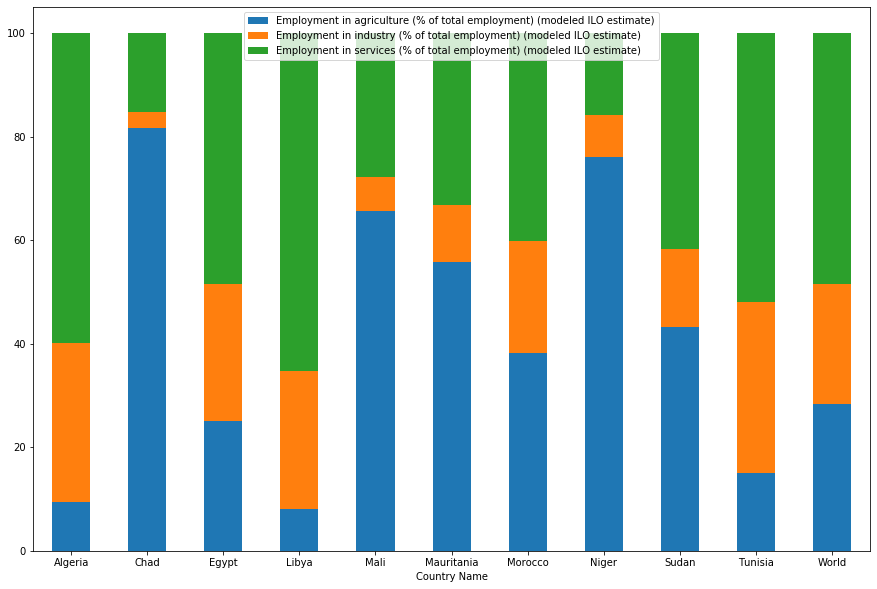

In [16]:
y = [
    'Employment in agriculture (% of total employment) (modeled ILO estimate)',
    'Employment in industry (% of total employment) (modeled ILO estimate)',
    'Employment in services (% of total employment) (modeled ILO estimate)'
]
df.plot.bar(x='Country Name',
            y=y,
            stacked=True,
            rot=0,
            figsize=(15, 10))

#

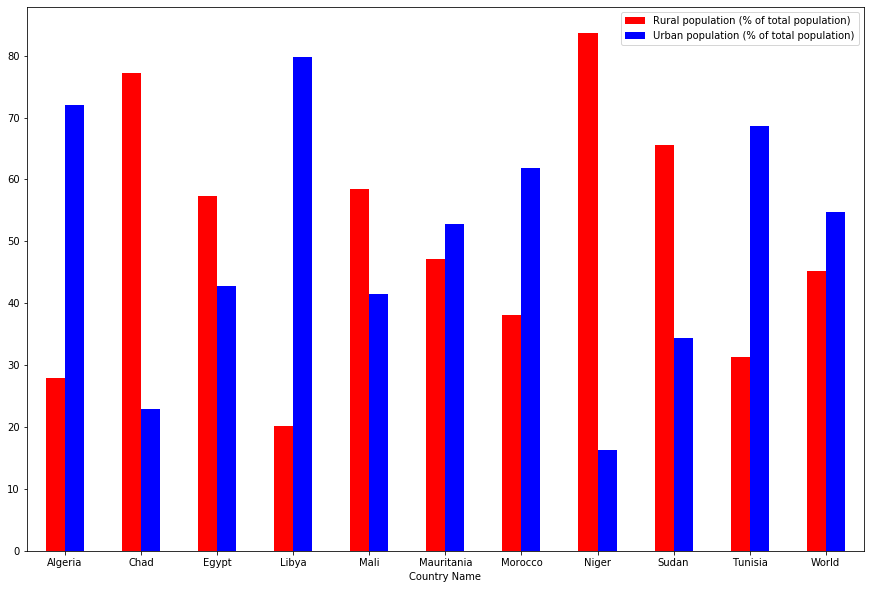

In [17]:
df.plot.bar(x='Country Name',
            y=[
                'Rural population (% of total population)',
                'Urban population (% of total population)',
                ],
            color=['r', 'b'],
            rot=0,
            figsize=(15, 10))

#

In [18]:
'''BOX PLOTS'''
#

'BOX PLOTS'

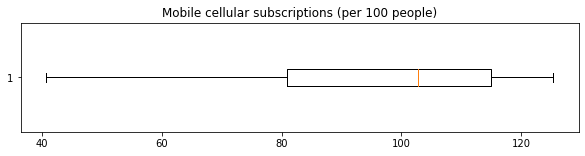

In [19]:
value = 'Mobile cellular subscriptions (per 100 people)'
plt.figure(num=None, figsize=(10, 2))
plt.boxplot(df[value],
            vert=False)
plt.title(value)
plt.show()

#

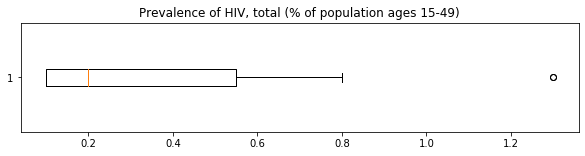

In [20]:
value = 'Prevalence of HIV, total (% of population ages 15-49)'
plt.figure(num=None, figsize=(10, 2))
plt.boxplot(df[value],
            vert=False)
plt.title(value)
plt.show()

#

In [21]:
'''SCATTER PLOTS'''
#

'SCATTER PLOTS'

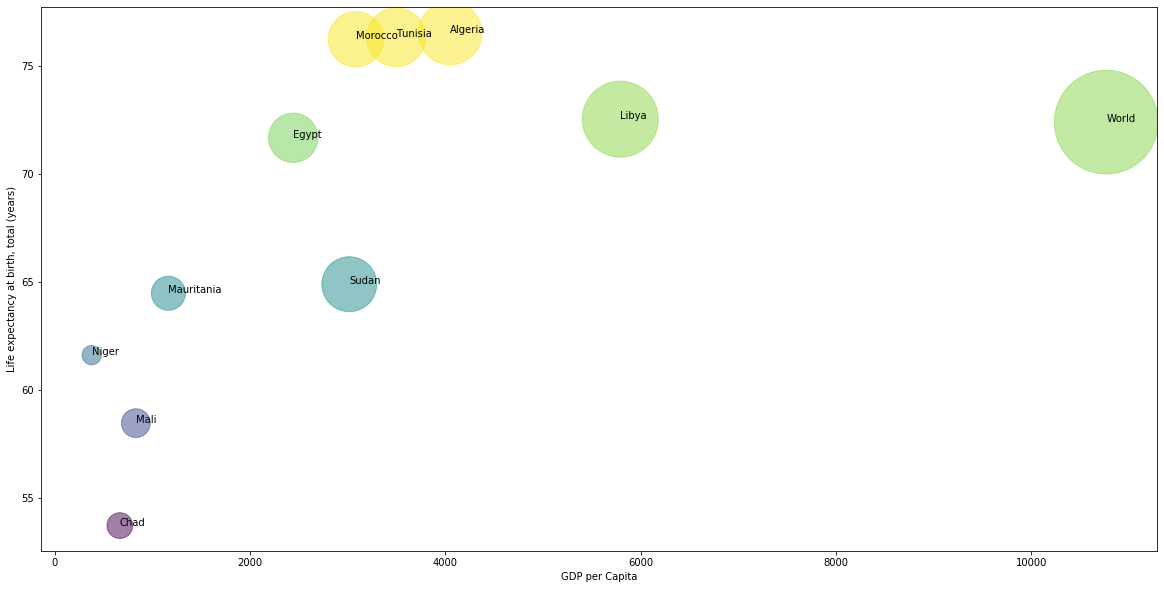

In [22]:
x = 'GDP per Capita'
y = 'Life expectancy at birth, total (years)'
plt.figure(num=None, figsize=(20, 10))
plt.scatter(
            df[x],
            df[y],
            c=df[y],
            s=df[x],
            cmap='viridis',
            alpha=0.5)
plt.xlabel(x)
plt.ylabel(y)
for i, txt in enumerate(df['Country Name']):
    plt.annotate(
                txt,
                (df.iloc[i][x],
                    df.iloc[i][y]))
plt.show()

#

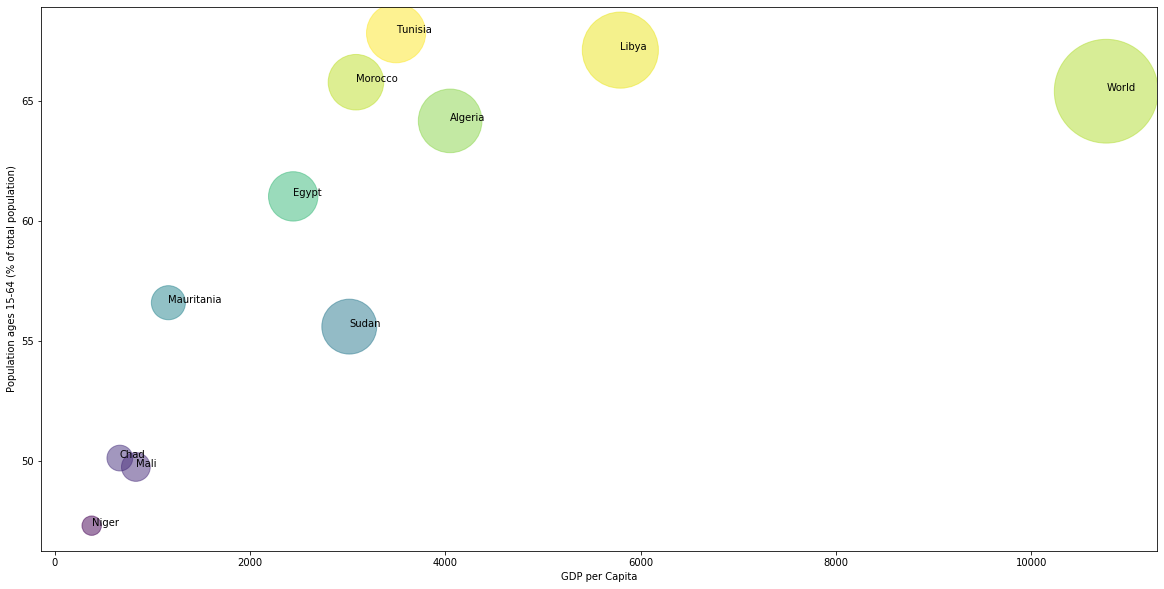

In [23]:
x = 'GDP per Capita'
y = 'Population ages 15-64 (% of total population)'
plt.figure(num=None, figsize=(20, 10))
plt.scatter(
            df[x],
            df[y],
            c=df[y],
            s=df[x],
            cmap='viridis',
            alpha=0.5)
plt.xlabel(x)
plt.ylabel(y)
for i, txt in enumerate(df['Country Name']):
    plt.annotate(
                txt,
                (df.iloc[i][x],
                    df.iloc[i][y]))
plt.show()

#

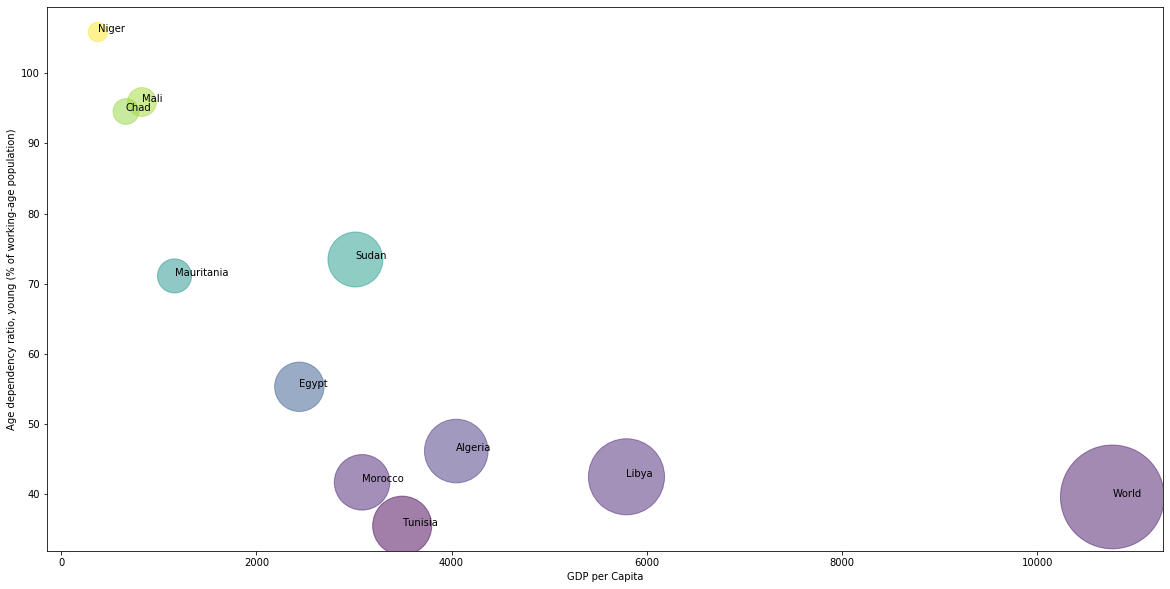

In [24]:
x = 'GDP per Capita'
y = 'Age dependency ratio, young (% of working-age population)'
plt.figure(num=None, figsize=(20, 10))
plt.scatter(
            df[x],
            df[y],
            c=df[y],
            s=df[x],
            cmap='viridis',
            alpha=0.5)
plt.xlabel(x)
plt.ylabel(y)
for i, txt in enumerate(df['Country Name']):
    plt.annotate(
                txt,
                (df.iloc[i][x],
                    df.iloc[i][y]))
plt.show()

#

In [25]:
'''ADDITIONAL ANALYSIS (GROUPING POOR AND REACH COUNTRIES)'''
#

'ADDITIONAL ANALYSIS (GROUPING POOR AND REACH COUNTRIES)'

In [26]:
df_rich = df.iloc[:-1].\
    loc[df['Age dependency ratio, young (% of working-age population)'] < 65]
df_rich = df_rich.reset_index(drop=True)
df_rich

#

,Country Name,Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)","Age dependency ratio, young (% of working-age population)","Agriculture, forestry, and fishing, value added (% of GDP)",Armed forces personnel (% of total labor force),"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Employment in agriculture (% of total employment) (modeled ILO estimate),Employment in industry (% of total employment) (modeled ILO estimate),Employment in services (% of total employment) (modeled ILO estimate),"Fertility rate, total (births per woman)",GDP (current US$),GDP growth (annual %),"Industry (including construction), value added (% of GDP)","Life expectancy at birth, total (years)",Merchandise trade (% of GDP),Military expenditure (% of GDP),Mobile cellular subscriptions (per 100 people),Number of people pushed below the $3.10 ($ 2011 PPP) poverty line by out-of-pocket health care expenditure,Population ages 0-14 (% of total population),Population ages 15-64 (% of total population),Population ages 65 and above (% of total population),Population density (people per sq. km of land area),Population growth (annual %),Population in the largest city (% of urban population),Population living in slums (% of urban population),"Population, female","Population, male","Population, total","Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),Rural population (% of total population),"Services, value added (% of GDP)",Surface area (sq. km),Urban population (% of total population),Urban population growth (annual %),GDP per Capita
0,Algeria,100.000000,100.000000,100.000000,10.071,55.804001,9.624334,46.179668,12.272164,2.631164,24.846,4.717,9.386000,30.754999,59.859001,3.045,1.675553e+11,1.600000,37.242121,76.499,48.491459,6.014253,110.767246,0.300284,29.639590,64.183205,6.177205,17.377715,2.044953,8.917563,0.494109,20482430.0,20906768.0,41389198.0,0.1,3.9,27.948,45.615016,2381740.0,72.052,2.871374,4048.285258
1,Egypt,100.000000,100.000000,100.000000,53.819,63.836313,8.499716,55.336597,11.485285,2.726499,27.050,5.863,25.040001,26.570999,48.389000,3.370,2.353691e+11,4.181221,33.750764,71.656,37.061360,1.422609,106.755939,0.000000,33.775538,61.036530,5.187932,96.883413,2.090835,47.706510,0.423632,47706816.0,48735777.0,96442593.0,0.1,4.5,57.295,53.020542,1001450.0,42.705,2.027629,2440.510173
2,Libya,70.148201,70.148201,70.148201,5.769,48.961526,6.448804,42.512723,0.000000,0.000000,19.380,5.099,8.037000,26.697001,65.265999,2.277,3.811598e+10,26.675870,0.000000,72.520,78.014519,0.000000,91.479296,0.346465,28.539398,67.131428,4.329174,3.740025,1.354886,21.889046,0.730092,3255123.0,3325601.0,6580724.0,0.2,0.0,20.183,0.000000,1759540.0,79.817,1.702529,5792.065110
3,Morocco,100.000000,100.000000,100.000000,31.034,51.989421,10.264376,41.725045,12.378762,2.096988,19.399,5.072,38.292999,21.587000,40.119999,2.451,1.097087e+11,4.087507,26.126096,76.218,64.038660,3.185027,123.424725,0.227127,27.452598,65.794054,6.753348,79.725059,1.287003,16.584380,0.640633,17938683.0,17642611.0,35581294.0,0.1,3.4,38.092,49.956315,446550.0,61.908,2.176127,3083.325998
4,Tunisia,100.000000,100.000000,100.000000,7.841,47.414265,11.870289,35.543976,9.543338,1.186557,18.010,6.274,15.042000,32.931000,52.027000,2.219,3.995210e+10,1.824675,23.120398,76.310,87.249491,2.130722,125.369760,0.326578,24.111626,67.836040,8.052334,73.593222,1.139079,28.723059,0.554019,5768089.0,5665354.0,11433443.0,0.1,4.3,31.358,60.306373,163610.0,68.642,1.571234,3494.318864


In [27]:
df_rich.describe()

#

,Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)","Age dependency ratio, young (% of working-age population)","Agriculture, forestry, and fishing, value added (% of GDP)",Armed forces personnel (% of total labor force),"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Employment in agriculture (% of total employment) (modeled ILO estimate),Employment in industry (% of total employment) (modeled ILO estimate),Employment in services (% of total employment) (modeled ILO estimate),"Fertility rate, total (births per woman)",GDP (current US$),GDP growth (annual %),"Industry (including construction), value added (% of GDP)","Life expectancy at birth, total (years)",Merchandise trade (% of GDP),Military expenditure (% of GDP),Mobile cellular subscriptions (per 100 people),Number of people pushed below the $3.10 ($ 2011 PPP) poverty line by out-of-pocket health care expenditure,Population ages 0-14 (% of total population),Population ages 15-64 (% of total population),Population ages 65 and above (% of total population),Population density (people per sq. km of land area),Population growth (annual %),Population in the largest city (% of urban population),Population living in slums (% of urban population),"Population, female","Population, male","Population, total","Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),Rural population (% of total population),"Services, value added (% of GDP)",Surface area (sq. km),Urban population (% of total population),Urban population growth (annual %),GDP per Capita
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000e+00,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000e+00,5.000000e+00,5.000000e+00,5.000000,5.000000,5.000000,5.000000,5.000000e+00,5.000000,5.000000,5.000000
mean,94.029640,94.029640,94.029640,21.706800,53.601105,9.341504,44.259602,9.135910,1.728242,21.737000,5.405000,19.159600,27.708200,53.132200,2.67240,1.181402e+11,7.673855,24.047876,74.640600,62.971098,2.550522,111.559393,0.240091,28.703750,65.196251,6.099999,54.263887,1.583351,24.764111,0.568497,1.903023e+07,1.925522e+07,3.828545e+07,0.120000,3.220000,34.975200,41.779649,1.150578e+06,65.024800,2.069779,3771.701081
std,13.350130,13.350130,13.350130,20.614654,6.557676,2.025016,7.277090,5.232174,1.143241,3.962514,0.640858,12.618005,4.368795,9.817277,0.50902,8.481276e+10,10.691604,14.592067,2.352314,20.602543,2.255749,13.769743,0.141625,3.509944,2.711102,1.432840,41.083965,0.449447,14.733584,0.120464,1.768039e+07,1.811676e+07,3.579602e+07,0.044721,1.848513,14.046021,23.961971,9.190477e+05,14.046021,0.509672,1272.913980
min,70.148201,70.148201,70.148201,5.769000,47.414265,6.448804,35.543976,0.000000,0.000000,18.010000,4.717000,8.037000,21.587000,40.119999,2.21900,3.811598e+10,1.600000,0.000000,71.656000,37.061360,0.000000,91.479296,0.000000,24.111626,61.036530,4.329174,3.740025,1.139079,8.917563,0.423632,3.255123e+06,3.325601e+06,6.580724e+06,0.100000,0.000000,20.183000,0.000000,1.636100e+05,42.705000,1.571234,2440.510173
25%,100.000000,100.000000,100.000000,7.841000,48.961526,8.499716,41.725045,9.543338,1.186557,19.380000,5.072000,9.386000,26.570999,48.389000,2.27700,3.995210e+10,1.824675,23.120398,72.520000,48.491459,1.422609,106.755939,0.227127,27.452598,64.183205,5.187932,17.377715,1.287003,16.584380,0.494109,5.768089e+06,5.665354e+06,1.143344e+07,0.100000,3.400000,27.948000,45.615016,4.465500e+05,61.908000,1.702529,3083.325998
50%,100.000000,100.000000,100.000000,10.071000,51.989421,9.624334,42.512723,11.485

In [28]:
df_poor = df.iloc[:-1].\
    loc[df['Age dependency ratio, young (% of working-age population)'] > 65]
df_poor = df_poor.reset_index(drop=True)
df_poor

#

,Country Name,Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)","Age dependency ratio, young (% of working-age population)","Agriculture, forestry, and fishing, value added (% of GDP)",Armed forces personnel (% of total labor force),"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Employment in agriculture (% of total employment) (modeled ILO estimate),Employment in industry (% of total employment) (modeled ILO estimate),Employment in services (% of total employment) (modeled ILO estimate),"Fertility rate, total (births per woman)",GDP (current US$),GDP growth (annual %),"Industry (including construction), value added (% of GDP)","Life expectancy at birth, total (years)",Merchandise trade (% of GDP),Military expenditure (% of GDP),Mobile cellular subscriptions (per 100 people),Number of people pushed below the $3.10 ($ 2011 PPP) poverty line by out-of-pocket health care expenditure,Population ages 0-14 (% of total population),Population ages 15-64 (% of total population),Population ages 65 and above (% of total population),Population density (people per sq. km of land area),Population growth (annual %),Population in the largest city (% of urban population),Population living in slums (% of urban population),"Population, female","Population, male","Population, total","Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),Rural population (% of total population),"Services, value added (% of GDP)",Surface area (sq. km),Urban population (% of total population),Urban population growth (annual %),GDP per Capita
0,Chad,10.876416,2.488017,39.185883,161.090,99.470559,4.920371,94.550188,48.613086,0.621619,42.683,12.309,81.706001,3.039,15.255000,5.846,9.975692e+09,-2.988696,14.628548,53.712,43.104779,2.238589,42.409967,0.419905,47.400573,50.132708,2.466718,11.925646,3.077532,37.165721,0.466319,7521764.0,7495009.0,15016773.0,1.3,37.5,77.142,33.507131,1284000.0,22.858,3.872530,664.303316
1,Mali,43.089840,11.711073,87.191605,169.127,100.955473,5.053860,95.901614,38.334734,0.261941,42.078,9.984,65.716003,6.390,27.893999,5.968,1.533961e+10,5.400000,18.112626,58.452,46.885142,3.011908,119.023326,0.200731,47.722817,49.762268,2.514916,15.171731,2.999115,30.773852,0.617212,9249013.0,9263381.0,18512394.0,1.3,6.3,58.428,37.539617,1240190.0,41.572,4.915262,828.613220
2,Mauritania,42.912319,0.000000,82.618835,71.049,76.657447,5.530634,71.126814,23.883596,1.774482,34.132,7.339,55.714001,11.063,33.223000,4.619,4.975432e+09,3.029480,26.747331,64.464,76.696855,2.907154,95.133460,0.120914,40.262553,56.606734,3.130714,4.155015,2.819000,51.013890,0.339097,2134658.0,2147916.0,4282574.0,0.2,10.4,47.176,36.867167,1030700.0,52.824,4.464278,1161.785457
3,Niger,20.041904,10.844501,67.097740,186.538,111.343400,5.475398,105.868002,39.652428,0.117755,46.540,8.529,76.097000,8.040,15.863000,7.001,8.119710e+09,4.893437,15.861856,61.599,38.893014,2.473555,40.638500,0.173122,50.092883,47.316356,2.590761,17.054134,3.839154,33.347301,0.326436,10757486.0,10844986.0,21602472.0,0.3,16.5,83.650,38.310716,1267000.0,16.350,4.206788,375.869490
4,Sudan,56.451550,42.796626,82.525818,63.993,79.823230,6.357123,73.466107,30.453238,1.087996,32.542,7.261,43.217999,15.043,41.738998,4.469,1.230534e+11,4.283071,2.310512,64.881,10.754682,3.910878,70.183178,0.591979,40.854624,55.610169,3.535207,0.000000,2.395220,38.462687,0.504985,20427931.0,20385465.0,40813396.0,0.2,20.1,65.630,46.790854,0.0,34.370,3.122324,3015.024430


In [29]:
df_poor.describe()

,Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)","Age dependency ratio, young (% of working-age population)","Agriculture, forestry, and fishing, value added (% of GDP)",Armed forces personnel (% of total labor force),"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Employment in agriculture (% of total employment) (modeled ILO estimate),Employment in industry (% of total employment) (modeled ILO estimate),Employment in services (% of total employment) (modeled ILO estimate),"Fertility rate, total (births per woman)",GDP (current US$),GDP growth (annual %),"Industry (including construction), value added (% of GDP)","Life expectancy at birth, total (years)",Merchandise trade (% of GDP),Military expenditure (% of GDP),Mobile cellular subscriptions (per 100 people),Number of people pushed below the $3.10 ($ 2011 PPP) poverty line by out-of-pocket health care expenditure,Population ages 0-14 (% of total population),Population ages 15-64 (% of total population),Population ages 65 and above (% of total population),Population density (people per sq. km of land area),Population growth (annual %),Population in the largest city (% of urban population),Population living in slums (% of urban population),"Population, female","Population, male","Population, total","Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),Rural population (% of total population),"Services, value added (% of GDP)",Surface area (sq. km),Urban population (% of total population),Urban population growth (annual %),GDP per Capita
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000e+00,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000e+00,5.000000e+00,5.000000e+00,5.000000,5.000000,5.000000,5.000000,5.000000e+00,5.000000,5.000000,5.000000
mean,34.674406,13.568043,71.723976,130.359400,93.650022,5.467477,88.182545,36.187417,0.772759,39.595000,9.084400,64.490201,8.715000,26.794799,5.580600,3.229277e+10,2.923458,15.532175,60.621600,43.266894,2.908417,73.477686,0.301330,45.266690,51.885647,2.847663,9.661305,3.026004,38.152690,0.450810,1.001817e+07,1.002735e+07,2.004552e+07,0.660000,18.160000,66.405200,38.603097,9.643780e+05,33.594800,4.116237,1209.119182
std,18.664010,17.117497,19.715190,58.149708,14.834349,0.562567,15.168865,9.424428,0.673727,5.990059,2.114651,15.509130,4.572606,11.385630,1.048616,5.087614e+10,3.421529,8.777472,4.645201,23.488588,0.642926,33.903713,0.198522,4.426790,4.019349,0.467620,7.311053,0.525674,7.810565,0.121258,6.668642e+06,6.652837e+06,1.332139e+07,0.585662,12.056451,14.548718,4.930471,5.486880e+05,14.548718,0.673615,1048.743106
min,10.876416,0.000000,39.185883,63.993000,76.657447,4.920371,71.126814,23.883596,0.117755,32.542000,7.261000,43.217999,3.039000,15.255000,4.469000,4.975432e+09,-2.988696,2.310512,53.712000,10.754682,2.238589,40.638500,0.120914,40.262553,47.316356,2.466718,0.000000,2.395220,30.773852,0.326436,2.134658e+06,2.147916e+06,4.282574e+06,0.200000,6.300000,47.176000,33.507131,0.000000e+00,16.350000,3.122324,375.869490
25%,20.041904,2.488017,67.097740,71.049000,79.823230,5.053860,73.466107,30.453238,0.261941,34.132000,7.339000,55.714001,6.390000,15.863000,4.619000,8.119710e+09,3.029480,14.628548,58.452000,38.893014,2.473555,42.409967,0.173122,40.854624,49.762268,2.514916,4.155015,2.819000,33.347301,0.339097,7.521764e+06,7.495009e+06,1.501677e+07,0.200000,10.400000,58.428000,36.867167,1.030700e+06,22.858000,3.872530,664.303316
50%,42.912319,10.844501,82.525818,161.090000,99.470559,5.475398,94.550188,38.33